In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16005    -122.45     37.74                52.0       1596.0           276.0   
2705     -115.59     32.85                20.0       1608.0           274.0   
14001    -117.29     34.57                22.0       1054.0           239.0   
385      -122.29     37.90                49.0       1283.0           238.0   
17437    -120.45     34.64                17.0       1226.0           277.0   
...          ...       ...                 ...          ...             ...   
1566     -121.96     37.74                 2.0        200.0            20.0   
18735    -122.40     40.51                20.0       1750.0           352.0   
11822    -121.07     38.94                14.0       1710.0           294.0   
1817     -122.31     37.93                36.0       2403.0           408.0   
16807    -122.41     37.66                40.0       1294.0           308.0   

       population  households  median_income ocean_proximity  \
16005       642.0       273.0         4.3750        NEAR BAY   
2705        862.0       248.0         4.8750          INLAND   
14001       428.0       239.0         1.2548          INLAND   
385         576.0       236.0         3.3333        NEAR BAY   
17437       484.0       224.0         3.2167      NEAR OCEAN   
...           ...         ...            ...             ...   
1566         25.0         9.0        15.0001       <1H OCEAN   
18735       834.0       340.0         2.4850          INLAND   
11822       839.0       297.0         4.7143          INLAND   
1817        917.0       404.0         5.0399        NEAR BAY   
16807      1177.0       301.0         3.6667      NEAR OCEAN   

       median_house_value  
16005            349500.0  
2705              90800.0  
14001             68300.0  
385              276800.0  
17437            112500.0  
...                   ...  
1566             350000.0  
18735            100600.0  
11822            150700.0  
1817             253400.0  
16807            218800.0  

[16346 rows x 10 columns]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

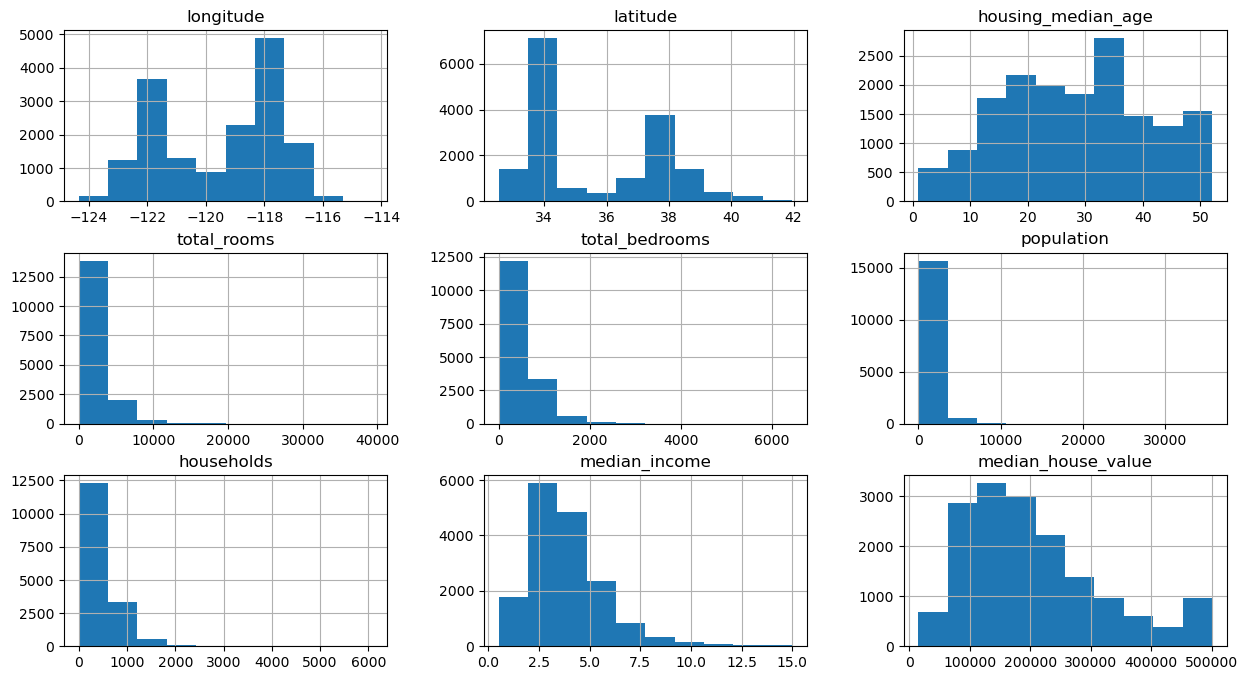

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

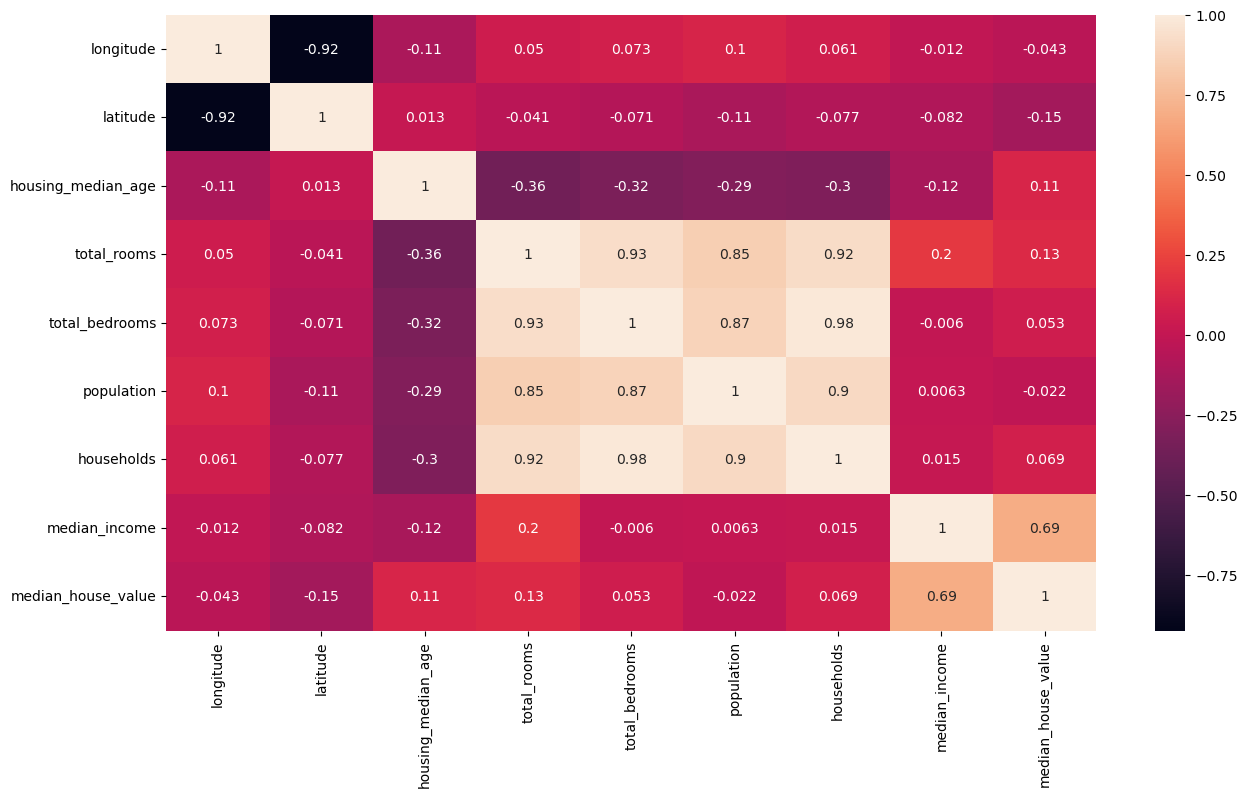

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
#NgƒÉn ko cho d·ªØ li·ªáu trong histogram b·ªã l·ªách

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

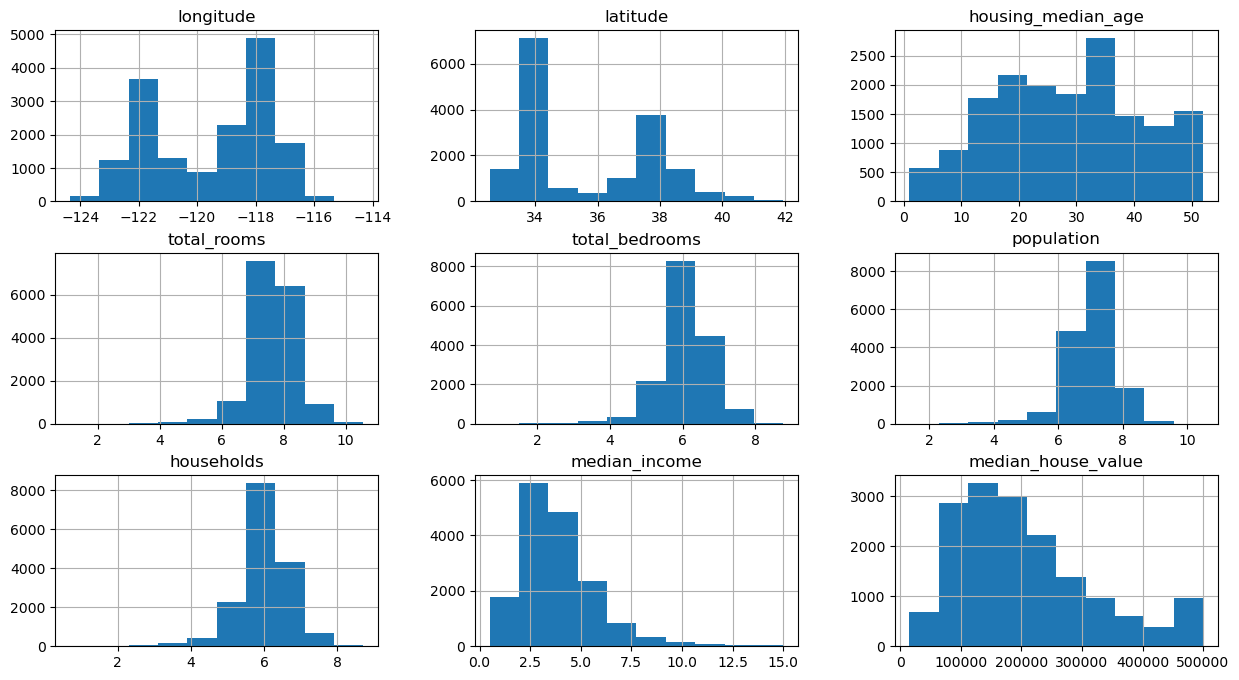

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7225
INLAND        5211
NEAR OCEAN    2087
NEAR BAY      1820
ISLAND           3
Name: count, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu categorical th√†nh binary do h·ªá th·ªëng ko ƒë·ªçc ƒë∆∞·ª£c d·ªØ li·ªáu string

<Axes: >

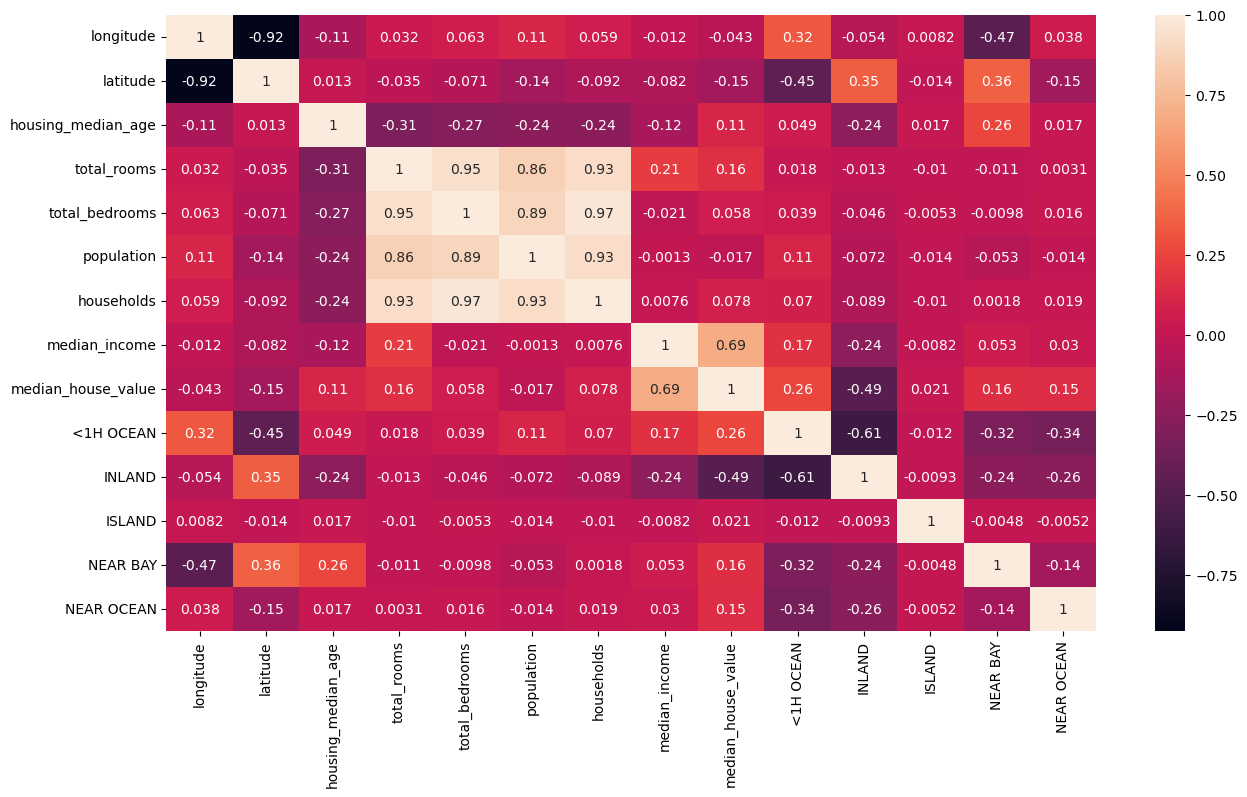

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

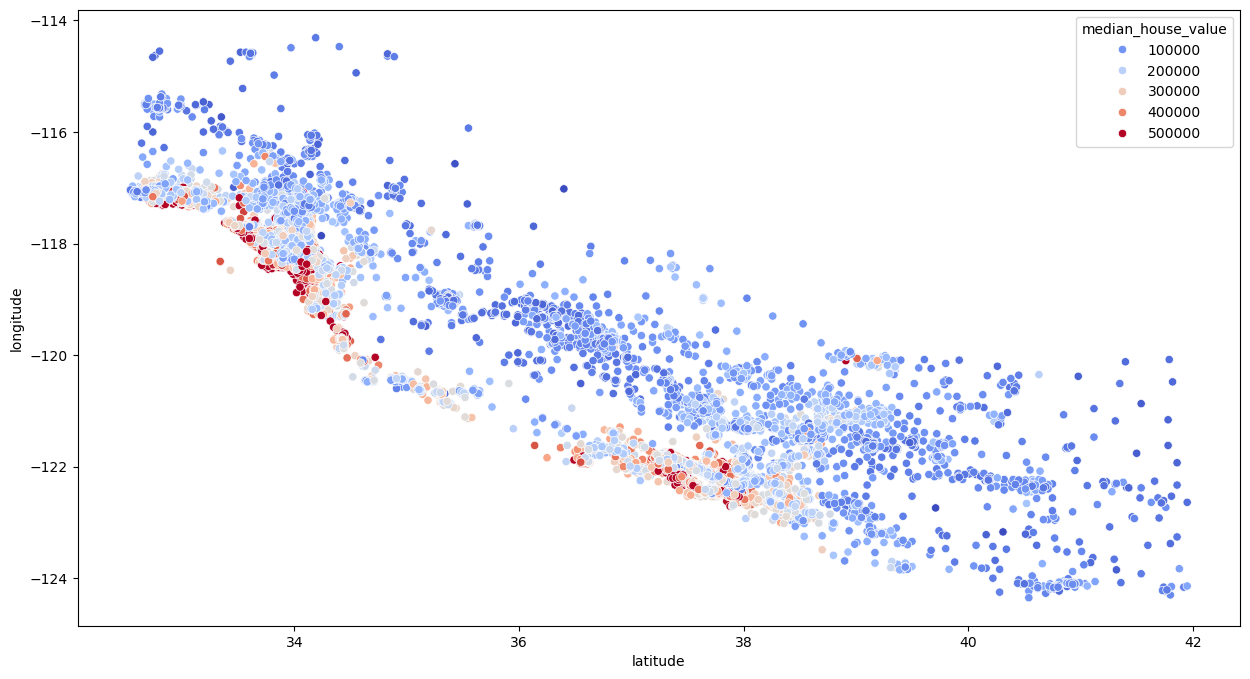

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [18]:
#Creating new features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_room'] = train_data['total_rooms'] / train_data['households']

<Axes: >

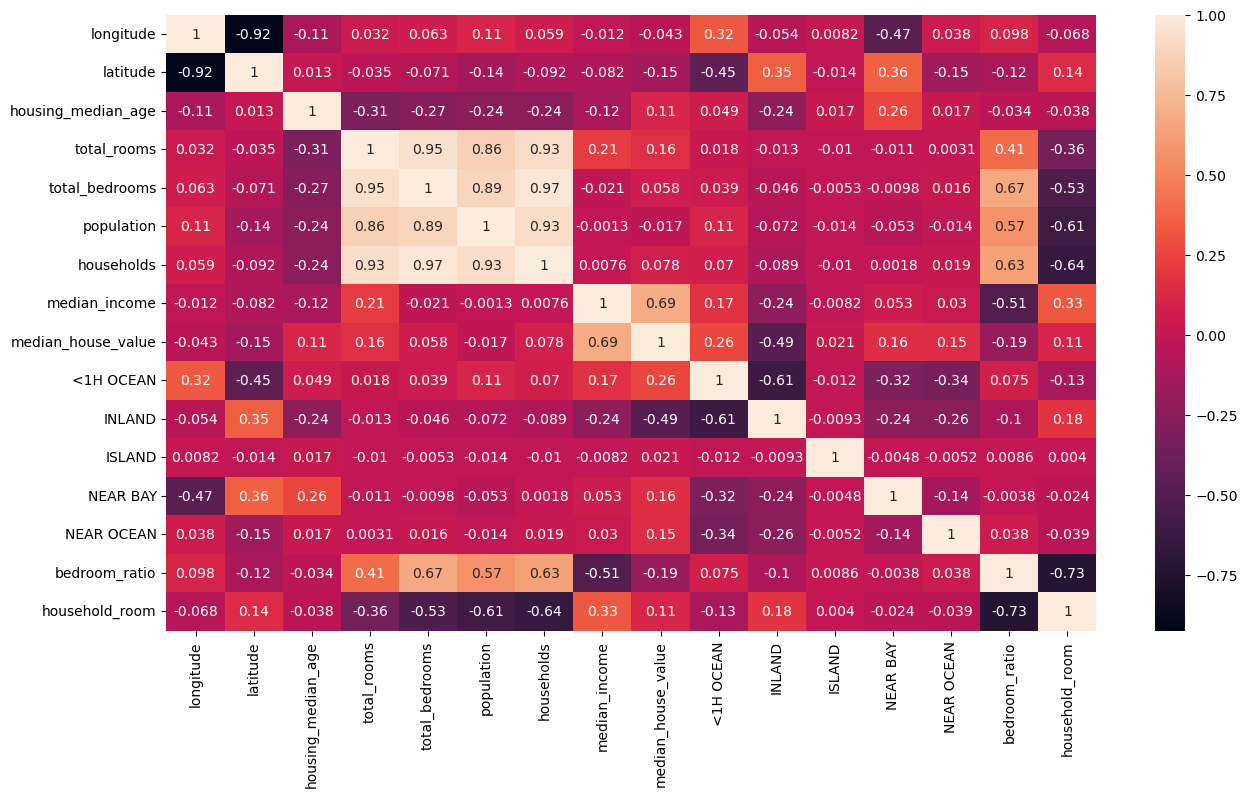

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [20]:
#Train mutiple model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [21]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
#NgƒÉn ko cho d·ªØ li·ªáu trong histogram b·ªã l·ªách
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
#Chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu categorical th√†nh binary do h·ªá th·ªëng ko ƒë·ªçc ƒë∆∞·ª£c d·ªØ li·ªáu string
#Creating new features
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_room'] = test_data['total_rooms'] / test_data['households']

In [22]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [23]:
X_test_s = scaler.transform(X_test)

In [24]:
reg.score(X_test_s, y_test)


0.6732066826437797

In [25]:
# üìå NOTE: CHU·∫®N H√ìA D·ªÆ LI·ªÜU TR∆Ø·ªöC KHI HU·∫§N LUY·ªÜN M√î H√åNH H·ªíI QUY TUY·∫æN T√çNH

"""
‚úÖ V√¨ sao c·∫ßn chu·∫©n h√≥a?
- Khi c√°c c·ªôt ƒë·∫ßu v√†o (feature) c√≥ ƒë∆°n v·ªã ho·∫∑c gi√° tr·ªã r·∫•t kh√°c nhau 
  (VD: 'total_rooms' l√™n t·ªõi h√†ng ngh√¨n, c√≤n 'income' ch·ªâ t·ª´ 0‚Äì10),
  th√¨ Linear Regression s·∫Ω b·ªã l·ªách ‚Äî ∆∞u ti√™n c√°c c·ªôt c√≥ gi√° tr·ªã l·ªõn.

‚úÖ Chu·∫©n h√≥a gi√∫p:
- M√¥ h√¨nh h·ªôi t·ª• t·ªët h∆°n khi hu·∫•n luy·ªán.
- H·ªá s·ªë h·ªìi quy (coefficient) ph·∫£n √°nh ƒë√∫ng m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa t·ª´ng bi·∫øn.
- Tr√°nh hi·ªán t∆∞·ª£ng ‚Äúdominant feature‚Äù do scale kh√¥ng ƒë·ªìng ƒë·ªÅu.

‚úÖ C√°ch l√†m:
- S·ª≠ d·ª•ng StandardScaler ho·∫∑c MinMaxScaler ƒë·ªÉ chu·∫©n h√≥a X_train.
- Sau ƒë√≥ d√πng scaler.transform(X_test) ƒë·ªÉ chu·∫©n h√≥a t·∫≠p test.

‚ùå Kh√¥ng c·∫ßn chu·∫©n h√≥a v·ªõi c√°c m√¥ h√¨nh nh∆∞: Decision Tree, Random Forest, XGBoost,...

‚û°Ô∏è Ghi nh·ªõ:
    Linear models + Feature c√≥ scale kh√°c nhau ‚Üí PH·∫¢I chu·∫©n h√≥a!
"""

"\n‚úÖ V√¨ sao c·∫ßn chu·∫©n h√≥a?\n- Khi c√°c c·ªôt ƒë·∫ßu v√†o (feature) c√≥ ƒë∆°n v·ªã ho·∫∑c gi√° tr·ªã r·∫•t kh√°c nhau \n  (VD: 'total_rooms' l√™n t·ªõi h√†ng ngh√¨n, c√≤n 'income' ch·ªâ t·ª´ 0‚Äì10),\n  th√¨ Linear Regression s·∫Ω b·ªã l·ªách ‚Äî ∆∞u ti√™n c√°c c·ªôt c√≥ gi√° tr·ªã l·ªõn.\n\n‚úÖ Chu·∫©n h√≥a gi√∫p:\n- M√¥ h√¨nh h·ªôi t·ª• t·ªët h∆°n khi hu·∫•n luy·ªán.\n- H·ªá s·ªë h·ªìi quy (coefficient) ph·∫£n √°nh ƒë√∫ng m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng c·ªßa t·ª´ng bi·∫øn.\n- Tr√°nh hi·ªán t∆∞·ª£ng ‚Äúdominant feature‚Äù do scale kh√¥ng ƒë·ªìng ƒë·ªÅu.\n\n‚úÖ C√°ch l√†m:\n- S·ª≠ d·ª•ng StandardScaler ho·∫∑c MinMaxScaler ƒë·ªÉ chu·∫©n h√≥a X_train.\n- Sau ƒë√≥ d√πng scaler.transform(X_test) ƒë·ªÉ chu·∫©n h√≥a t·∫≠p test.\n\n‚ùå Kh√¥ng c·∫ßn chu·∫©n h√≥a v·ªõi c√°c m√¥ h√¨nh nh∆∞: Decision Tree, Random Forest, XGBoost,...\n\n‚û°Ô∏è Ghi nh·ªõ:\n    Linear models + Feature c√≥ scale kh√°c nhau ‚Üí PH·∫¢I chu·∫©n h√≥a!\n"

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [27]:
# üìå NOTE: Ch·ªâ c·∫ßn scale X, kh√¥ng c·∫ßn scale y (v·ªõi Linear Regression)

"""
‚úÖ Scale X ƒë·ªÉ ƒë∆∞a c√°c feature v·ªÅ c√πng thang ƒëo ‚Üí gi√∫p m√¥ h√¨nh h·ªçc hi·ªáu qu·∫£ h∆°n.
‚ùå Kh√¥ng c·∫ßn scale y v√¨:
   - M√¥ h√¨nh v·∫´n h·ªçc t·ªët v·ªõi y g·ªëc.
   - Ta mu·ªën d·ª± ƒëo√°n y (gi√° tr·ªã th·ª±c, nh∆∞ gi√° nh√†) ƒë√∫ng ƒë∆°n v·ªã ban ƒë·∫ßu.

‚ö†Ô∏è Ch·ªâ scale y khi d√πng m√¥ h√¨nh ph·ª©c t·∫°p (Neural Network, SVR) ho·∫∑c y qu√° l·ªách.

‚û°Ô∏è Nh·ªõ: "Scale X ƒë·ªÉ m√¥ h√¨nh h·ªçc t·ªët, gi·ªØ nguy√™n y ƒë·ªÉ k·∫øt qu·∫£ d·ªÖ hi·ªÉu."
"""


'\n‚úÖ Scale X ƒë·ªÉ ƒë∆∞a c√°c feature v·ªÅ c√πng thang ƒëo ‚Üí gi√∫p m√¥ h√¨nh h·ªçc hi·ªáu qu·∫£ h∆°n.\n‚ùå Kh√¥ng c·∫ßn scale y v√¨:\n   - M√¥ h√¨nh v·∫´n h·ªçc t·ªët v·ªõi y g·ªëc.\n   - Ta mu·ªën d·ª± ƒëo√°n y (gi√° tr·ªã th·ª±c, nh∆∞ gi√° nh√†) ƒë√∫ng ƒë∆°n v·ªã ban ƒë·∫ßu.\n\n‚ö†Ô∏è Ch·ªâ scale y khi d√πng m√¥ h√¨nh ph·ª©c t·∫°p (Neural Network, SVR) ho·∫∑c y qu√° l·ªách.\n\n‚û°Ô∏è Nh·ªõ: "Scale X ƒë·ªÉ m√¥ h√¨nh h·ªçc t·ªët, gi·ªØ nguy√™n y ƒë·ªÉ k·∫øt qu·∫£ d·ªÖ hi·ªÉu."\n'

In [28]:
forest.score(X_test_s, y_test)

0.8123397123031982

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
param_grid = {
"n_estimators":[30,50,100],  # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (b·∫°n t·ª± ch·ªçn)
"max_features":[8,12,20],  # S·ªë l∆∞·ª£ng c·ªôt ƒë∆∞·ª£c x√©t t·∫°i m·ªói l·∫ßn chia (b·∫°n t·ª± ch·ªçn)
"min_samples_split":[2,4,6,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)
#scoring="neg_mean_squared_error", Ti√™u ch√≠ ƒë√°nh gi√°: MSE (l·∫•y gi√° tr·ªã √¢m)
#return_train_score=True      # Tr·∫£ v·ªÅ ƒëi·ªÉm s·ªë tr√™n c·∫£ train v√† validation
grid_search.fit(X_train_s, y_train)
## T√¨m tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh Random Forest b·∫±ng GridSearchCV v·ªõi ƒë√°nh gi√° MSE qua 5-fold cross-validation

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest=grid_search.best_estimator_

In [41]:
best_forest.score(X_test_s, y_test)

0.8089440215576454

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
param_grid = {
"n_estimators":[100,200,300],  # S·ªë l∆∞·ª£ng c√¢y trong r·ª´ng (b·∫°n t·ª± ch·ªçn)
"min_samples_split":[2,4],  # S·ªë l∆∞·ª£ng c·ªôt ƒë∆∞·ª£c x√©t t·∫°i m·ªói l·∫ßn chia (b·∫°n t·ª± ch·ªçn)
"max_depth":[None,4,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)
#scoring="neg_mean_squared_error", Ti√™u ch√≠ ƒë√°nh gi√°: MSE (l·∫•y gi√° tr·ªã √¢m)
#return_train_score=True      # Tr·∫£ v·ªÅ ƒëi·ªÉm s·ªë tr√™n c·∫£ train v√† validation
grid_search.fit(X_train_s, y_train)
## T√¨m tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh Random Forest b·∫±ng GridSearchCV v·ªõi ƒë√°nh gi√° MSE qua 5-fold cross-validation

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')